In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context("talk")

In [2]:
title_principals = pd.read_csv('imdb.title.principals.csv.gz')
title_principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [3]:
title_pricipals_1 = title_principals.drop('job', axis=1)
title_pricipals_1.head()

,tconst,ordering,nconst,category,characters
0,tt0111414,1,nm0246005,actor,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN
2,tt0111414,3,nm3739909,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN
4,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]"


In [4]:
main_pricipals = title_pricipals_1.drop('characters', axis=1)
main_pricipals.head()

,tconst,ordering,nconst,category
0,tt0111414,1,nm0246005,actor
1,tt0111414,2,nm0398271,director
2,tt0111414,3,nm3739909,producer
3,tt0323808,10,nm0059247,editor
4,tt0323808,1,nm3579312,actress


In [5]:
title_basics = pd.read_csv('imdb.title.basics.csv.gz')
title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
title_basics_1 = title_basics.drop('original_title', axis=1)
title_basics_1.head()

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
title_basics_2 = title_basics_1.drop('start_year', axis=1)
title_basics_2.head()

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


In [8]:
main_titles = title_basics_2.drop('runtime_minutes', axis=1)
main_titles.head()

,tconst,primary_title,genres
0,tt0063540,Sunghursh,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,Drama
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy"


In [9]:
director = main_titles.merge(main_pricipals, on="tconst", how='inner')
director.head()

,tconst,primary_title,genres,ordering,nconst,category
0,tt0063540,Sunghursh,"Action,Crime,Drama",10,nm0006210,composer
1,tt0063540,Sunghursh,"Action,Crime,Drama",1,nm0474801,actor
2,tt0063540,Sunghursh,"Action,Crime,Drama",2,nm0904537,actress
3,tt0063540,Sunghursh,"Action,Crime,Drama",3,nm0756379,actor
4,tt0063540,Sunghursh,"Action,Crime,Drama",4,nm0474876,actor


In [10]:
categories = director[director['category'] == 'director']
# director.drop(categories, inplace=False)
categories.head()

,tconst,primary_title,genres,ordering,nconst,category
5,tt0063540,Sunghursh,"Action,Crime,Drama",5,nm0712540,director
14,tt0066787,One Day Before the Rainy Season,"Biography,Drama",5,nm0002411,director
22,tt0069049,The Other Side of the Wind,Drama,5,nm0000080,director
32,tt0069204,Sabse Bada Sukh,"Comedy,Drama",5,nm0611531,director
42,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",5,nm0749914,director


In [11]:
categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)
categories["genres"].head()

<ipython-input-11-6f53b0115607>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categories["genres"] = categories["genres"].apply(lambda x: x.split(",") if type(x) == str else x)


5       [Action, Crime, Drama]
14          [Biography, Drama]
22                     [Drama]
32             [Comedy, Drama]
42    [Comedy, Drama, Fantasy]
Name: genres, dtype: object

In [12]:
categories_1 = (categories.explode('genres'))
categories_1.head()

,tconst,primary_title,genres,ordering,nconst,category
5,tt0063540,Sunghursh,Action,5,nm0712540,director
5,tt0063540,Sunghursh,Crime,5,nm0712540,director
5,tt0063540,Sunghursh,Drama,5,nm0712540,director
14,tt0066787,One Day Before the Rainy Season,Biography,5,nm0002411,director
14,tt0066787,One Day Before the Rainy Season,Drama,5,nm0002411,director


In [13]:
genres = categories_1[categories_1['genres'] == 'Adventure']
# director.drop(genres, inplace=False)
genres.head()

,tconst,primary_title,genres,ordering,nconst,category
255,tt0293429,Mortal Kombat,Adventure,1,nm2585406,director
282,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,5,nm1004541,director
283,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,6,nm0820800,director
342,tt0329539,Rice Girl,Adventure,5,nm0278780,director
368,tt0331314,Bunyan and Babe,Adventure,5,nm8625898,director


In [14]:
name_basics = pd.read_csv('imdb.name.basics.csv.gz')
name_basics.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [15]:
name_basics_1 = name_basics.drop('birth_year', axis=1)
name_basics_1.head()

,nconst,primary_name,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [16]:
name_basics_2 = name_basics_1.drop('death_year', axis=1)
name_basics_2.head()

,nconst,primary_name,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


In [17]:
name_basics_3 = name_basics_2.drop('known_for_titles', axis=1)
name_basics_3.head()

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,"production_designer,art_department,set_decorator"


In [18]:
name_basics_3["primary_profession"] = name_basics_3["primary_profession"].apply(lambda x: x.split(",") if type(x) == str else x)
name_basics_3["primary_profession"].head()

0        [miscellaneous, production_manager, producer]
1       [composer, music_department, sound_department]
2                       [miscellaneous, actor, writer]
3    [camera_department, cinematographer, art_depar...
4    [production_designer, art_department, set_deco...
Name: primary_profession, dtype: object

In [19]:
name_basics_4 = (name_basics_3.explode('primary_profession'))
name_basics_4.head()

,nconst,primary_name,primary_profession
0,nm0061671,Mary Ellen Bauder,miscellaneous
0,nm0061671,Mary Ellen Bauder,production_manager
0,nm0061671,Mary Ellen Bauder,producer
1,nm0061865,Joseph Bauer,composer
1,nm0061865,Joseph Bauer,music_department


In [20]:
final_name = name_basics_4[name_basics_4['primary_profession'] == 'director']
# director.drop(primary_profession, inplace=False)
final_name.head()

,nconst,primary_name,primary_profession
5,nm0062879,Ruel S. Bayani,director
10,nm0064023,Bryan Beasley,director
15,nm0066163,Arnaud Bedouët,director
16,nm0066268,Steve Mitchell Beebe,director
21,nm0068170,Dylan Bell,director


In [21]:
director_merge = genres.merge(final_name, on="nconst", how='inner')
director_merge.head()

,tconst,primary_title,genres,ordering,nconst,category,primary_name,primary_profession
0,tt0293429,Mortal Kombat,Adventure,1,nm2585406,director,Simon McQuoid,director
1,tt0312305,Quantum Quest: A Cassini Space Odyssey,Adventure,6,nm0820800,director,Daniel St. Pierre,director
2,tt0884726,Legends of Oz: Dorothy's Return,Adventure,6,nm0820800,director,Daniel St. Pierre,director
3,tt0329539,Rice Girl,Adventure,5,nm0278780,director,Michael Fischa,director
4,tt0331314,Bunyan and Babe,Adventure,5,nm8625898,director,Louis Ross,director


In [22]:
top_five = director_merge.primary_name.value_counts().head()
top_five

Kôbun Shizuno      9
Kunihiko Yuyama    8
David Yates        8
Hark Tsui          6
Mark Polonia       6
Name: primary_name, dtype: int64

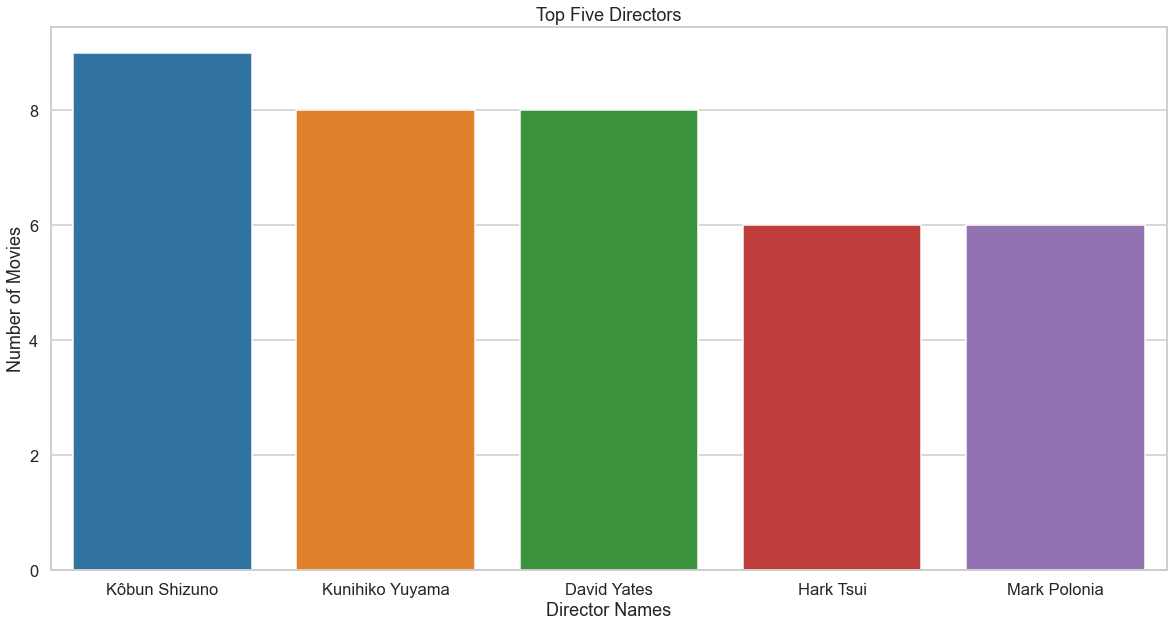

In [23]:
fig, ax = plt.subplots(figsize = (20,10))
top_five_graph = sns.barplot(x=top_five.index, y=top_five.values)
top_five_graph.set(title="Top Five Directors", xlabel="Director Names", ylabel="Number of Movies");

Which director has made the top grossing movie?